In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# install xgboost if not installed


In [2]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [3]:
import xgboost as xgb

### Load data test and train

In [4]:
test_df=pd.read_csv("/kaggle/input/mercedesbenz-greener-manufacturing/test.csv")
train_df=pd.read_csv("/kaggle/input/mercedesbenz-greener-manufacturing/train.csv")

In [5]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train_df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


<b> 1.If for any column(s), the variance is equal to zero, then you need to remove those variable(s).</b>

In [9]:
# Check variance for each feature or lables
train_df.var(axis=0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


ID      5.941936e+06
y       1.607667e+02
X10     1.313092e-02
X11     0.000000e+00
X12     6.945713e-02
            ...     
X380    8.014579e-03
X382    7.546747e-03
X383    1.660732e-03
X384    4.750593e-04
X385    1.423823e-03
Length: 370, dtype: float64

In [10]:
# Let check variance of each variable and store into another variable
train_variance=pd.DataFrame(train_df.var(axis=0),columns=['Cal_Variance'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [11]:
# check new variance variable
train_variance

,Cal_Variance
ID,5.941936e+06
y,1.607667e+02
X10,1.313092e-02
X11,0.000000e+00
X12,6.945713e-02
...,...
X380,8.014579e-03
X382,7.546747e-03
X383,1.660732e-03
X384,4.750593e-04


In [12]:
# Check zero variance features or columns
train_variance[train_variance["Cal_Variance"]==0]

,Cal_Variance
X11,0.0
X93,0.0
X107,0.0
X233,0.0
X235,0.0
X268,0.0
X289,0.0
X290,0.0
X293,0.0
X297,0.0


In [13]:
# Remove zero variance from train orignal data set
zero_var=train_variance[train_variance["Cal_Variance"]==0]
zero_var.index
train_clean_df=train_df.drop(columns=zero_var.index)

In [14]:
train_clean_df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Print the original and modified shape of the train dataset
print('Shape of original train dataset is:', train_df.shape)
print('\nShape of modified train dataset after removing features having zero variance is:', train_clean_df.shape)

Shape of original train dataset is: (4209, 378)

Shape of modified train dataset after removing features having zero variance is: (4209, 366)


<b> Remove zero variance form test dataset</b>

In [16]:
test_df.shape

(4209, 377)

In [17]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [18]:
test_df.var()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


ID      5.871311e+06
X10     1.865006e-02
X11     2.375861e-04
X12     6.885074e-02
X13     5.734498e-02
            ...     
X380    8.014579e-03
X382    8.715481e-03
X383    4.750593e-04
X384    7.124196e-04
X385    1.660732e-03
Length: 369, dtype: float64

In [19]:
test_var=pd.DataFrame(test_df.var(axis=0),columns=['Cal_Variance'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [20]:
test_zero_var=test_var[test_var["Cal_Variance"]==0]

In [21]:
test_zero_var

,Cal_Variance
X257,0.0
X258,0.0
X295,0.0
X296,0.0
X369,0.0


In [22]:
# Above dataset have zero variance features
# However, since test dataset is not using for Train Model so same features of train dataset that have zero variance 
# can remove from test dataset
#

In [23]:
test_clean_df=test_df.drop(zero_var.index,axis=1)

In [24]:
test_clean_df.shape

(4209, 365)

In [25]:
# Print the original and modified shape of the test dataset
print('Shape of original test dataset is:', test_df.shape)
print('\nShape of modified test dataset after removing features having zero variance is:', test_clean_df.shape)

Shape of original test dataset is: (4209, 377)

Shape of modified test dataset after removing features having zero variance is: (4209, 365)


### Note

In [26]:
# train dataset after modified have 366 column because "Y" column is there and same 365 column in test dataset after 
# modified

<b>2. Check for null and unique values for test and train sets.</b>

In [27]:
# check null in train modified dataset
train_clean_df.isna().all().sum()

0

In [28]:
# check null in test modified dataset
test_clean_df.isna().all().sum()

0

In [29]:
# check unique values for train set
train_clean_df.nunique()
#train_clean_df.info()

ID      4209
y       2545
X0        47
X1        27
X2        44
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 366, dtype: int64

In [30]:
# check unique values for test set
test_clean_df.nunique()

ID      4209
X0        49
X1        27
X2        45
X3         7
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 365, dtype: int64

<b>3. Apply label encoder</b>

In [31]:
# check categorical features


In [32]:
train_category=[]
for i in train_clean_df:
    #print(i)
    datatype=train_clean_df[i].dtype
    if datatype=='object':
        train_category.append(i)
        
train_category

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [33]:
#import sklearn for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [34]:
le=LabelEncoder()

In [35]:
for i in train_clean_df:
    datatype=train_clean_df[i].dtype
    if datatype=='object':
        train_clean_df[i]=le.fit_transform(train_clean_df[i])

In [36]:
train_clean_df.shape

(4209, 366)

In [37]:
train_clean_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# apply encoder on test data
test_categoty=[]
for i in test_clean_df:
    datatype=test_clean_df[i].dtype
    if datatype=='object':
        print(i)
        test_categoty.append(i)
        test_clean_df[i]=le.fit_transform(test_clean_df[i])

X0
X1
X2
X3
X4
X5
X6
X8


In [39]:
test_categoty


['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [40]:
test_clean_df.shape

(4209, 365)

In [41]:
test_clean_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


<b>4.Perform dimensionality reduction.</b>

In [42]:
#import sklearn for perform dimensionality reduction

In [43]:
from sklearn.decomposition import PCA

In [44]:
# train data
X_features=train_clean_df.drop(['ID','y'],axis=1)
y_output=train_clean_df['y']


#test data
test_clean_df=test_clean_df.drop(["ID"],axis=1)

In [45]:
X_features.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
test_clean_df.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [47]:
pca=PCA(n_components=0.96) # trying to get 96% varience of features

In [48]:
pca.fit(X_features)

PCA(n_components=0.96)

In [49]:
pca.explained_variance_ratio_

array([0.38334782, 0.21388033, 0.13261866, 0.11826642, 0.09206008,
       0.01590604, 0.0074454 ])

In [50]:
pca.explained_variance_

array([204.02462081, 113.83096499,  70.58204097,  62.94352325,
        48.99603633,   8.465483  ,   3.96257459])

In [51]:
pca.components_

array([[-9.31138471e-01,  2.45494127e-01,  2.57713643e-01, ...,
         2.84628944e-06, -9.56497803e-06, -2.86842355e-05],
       [ 2.63046285e-01, -1.92186472e-02,  9.59720661e-01, ...,
        -9.23858305e-05, -5.16075133e-07, -1.32382564e-05],
       [ 1.40346165e-01,  5.51248020e-01,  2.15461586e-03, ...,
        -1.13659802e-04,  4.64816456e-05,  1.61546453e-04],
       ...,
       [-3.70534242e-02, -6.57283698e-02,  7.12166981e-02, ...,
         2.31490768e-04,  2.05682622e-05,  2.26617308e-04],
       [ 5.55695432e-03, -3.71634808e-02,  2.43741488e-02, ...,
         3.28796669e-04, -1.92873257e-04,  3.00736096e-04],
       [-6.14197949e-03,  6.50469794e-02, -2.62151267e-02, ...,
         9.06017841e-04, -4.05319972e-05, -8.07777530e-04]])

In [52]:
X_features.shape

(4209, 364)

In [53]:
train_transform=pca.fit_transform(X_features)
test_transform=pca.fit_transform(test_clean_df)

In [54]:
print(train_transform.shape)
print(test_transform.shape)

(4209, 7)
(4209, 7)


In [55]:
train_transform

array([[  0.6147646 ,  -0.13300945,  15.62446002, ...,   1.35957377,
         -2.69141743,   3.81674139],
       [  0.56540665,   1.56033294,  17.9095812 , ...,   1.53664826,
         -4.44287654,  -0.79654047],
       [ 16.20171258,  12.29284626,  17.6335395 , ...,  11.85081968,
         -2.155389  ,   0.82819037],
       ...,
       [ 29.00466039,  14.86090532,  -7.75333217, ...,  -5.84698483,
          0.78930643,   3.39990873],
       [ 22.97242171,   1.68482437,  -9.03124768, ...,   9.4495573 ,
         -4.35522827,  -2.69952992],
       [-17.28304831,  -9.95198181,  -3.71935977, ...,   8.40170568,
          0.50947971,   1.253388  ]])

<b>4.Predict your test_df values using XGBoost.</b>

In [56]:
from xgboost import XGBRFRegressor

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
#Spliting train data
X_train,X_test,y_train,y_test= train_test_split(train_transform,y_output,test_size=0.3)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(test_transform.shape)

(2946, 7)
(1263, 7)
(2946,)
(1263,)
(4209, 7)


In [60]:
#Instantiation
xgb_reg=XGBRFRegressor(objective ='reg:linear',
                  n_estimators = 20, seed = 123)

# xgb_reg=XGBRFRegressor()

In [61]:
# fitting the model
model=xgb_reg.fit(X_train,y_train)


[12:00:49] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [62]:
# Predict the model
pred=xgb_reg.predict(X_test)

In [63]:
# RSME Computation
rmse=np.sqrt(mean_squared_error(y_test,pred))
print("RSME: % f"%(rmse))

RSME:  11.030561


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


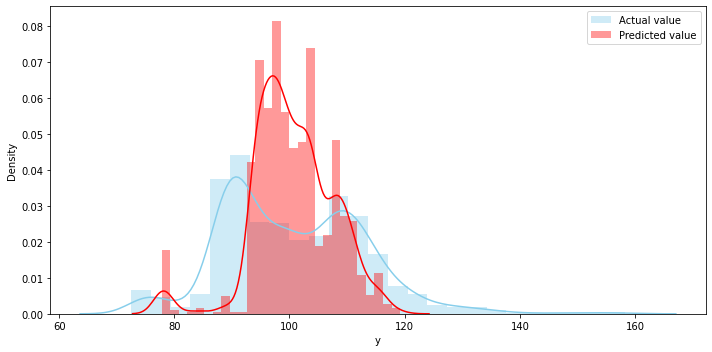

In [64]:
# display plot for train and test data only model
plt.figure(figsize=(10,5))

sns.distplot(y_test[y_test<160], color="skyblue", label="Actual value")
sns.distplot(pred[pred<160] , color="red", label="Predicted value")
plt.legend()

plt.tight_layout()

<b>k-fold Cross Validation using XGBoost</b>

In [65]:
from xgboost import DMatrix

In [66]:
dmatrix=xgb.DMatrix(data=train_transform, label= y_output)
params={'objective':'reg:linear','n_estimators': 20, 'seed':123}
model_cv=xgb.cv(dtrain=dmatrix, params=params,nfold=3,num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=7)
model_cv.tail(5)

[12:00:51] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:00:51] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:00:51] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:00:51] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:00:51] WARNING: ../src/objective

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
20,7.479578,0.412304,10.266614,0.798864
21,7.317675,0.343411,10.265381,0.804930
22,7.214502,0.325461,10.264772,0.809082
23,7.127641,0.300763,10.256266,0.814583
24,7.071158,0.285445,10.254379,0.820186


In [67]:
test_pred = model.predict(test_transform)
test_pred

array([ 77.62113,  96.81604,  97.11816, ...,  99.98515, 108.39718,
        94.92343], dtype=float32)

# Finished